# Import libraries

In [6]:
import numpy as np 
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxEDA
import datetime
from scipy import stats
from mpl_toolkits import mplot3d
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.stats import ks_2samp
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
from sklearn.preprocessing import normalize
sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import data day 1

In [7]:
# Sampling frequency 4Hz ~= 0.25s
fl_eda_1_part1 = pd.read_csv('../data/day_0/part1/EDA.csv' , header= None)
fl_eda_1_part1.columns  = ['eda']
fl_eda_freq_1 = fl_eda_1_part1.iloc[1].values
print(len(fl_eda_1_part1))
print('freq: ', fl_eda_freq_1)
fl_eda_1_part1.head(10)

2696
freq:  [4.]


,eda
0,1.530062e+09
1,4.000000e+00
2,0.000000e+00
3,7.379580e-01
4,7.420680e-01
5,6.741660e-01
6,6.754470e-01
7,6.754470e-01
8,6.767280e-01
9,6.728850e-01


In [9]:
fl_eda_1_part2 = pd.read_csv('../data/day_0/part2/EDA.csv' , header= None)
fl_eda_1_part2.columns  = ['eda']

print(len(fl_eda_1_part2))
fl_eda_1_part2.head(10)

3338


,eda
0,1.530061e+09
1,4.000000e+00
2,0.000000e+00
3,1.793650e-01
4,2.088320e-01
5,2.331740e-01
6,2.126750e-01
7,2.139570e-01
8,2.113940e-01
9,2.152380e-01


In [10]:
fl_eda_1 = pd.concat([fl_eda_1_part1, fl_eda_1_part2])

In [11]:
print(len(fl_eda_1))
fl_eda_1.head(5)

6034


,eda
0,1.530062e+09
1,4.000000e+00
2,0.000000e+00
3,7.379580e-01
4,7.420680e-01


## Convert time

In [12]:
fl_init_time_1 = datetime.datetime.fromtimestamp(fl_eda_1.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_1

'2018-06-26 18:06:42'

In [13]:
fl_eda_1 = fl_eda_1.iloc[3:]

In [14]:
fl_time_eda_1 = pd.date_range(start=fl_init_time_1, periods=len(fl_eda_1), 
                              freq=str(1/int(fl_eda_freq_1))+'S')
fl_time_eda_1

DatetimeIndex([       '2018-06-26 18:06:42', '2018-06-26 18:06:42.250000',
               '2018-06-26 18:06:42.500000', '2018-06-26 18:06:42.750000',
                      '2018-06-26 18:06:43', '2018-06-26 18:06:43.250000',
               '2018-06-26 18:06:43.500000', '2018-06-26 18:06:43.750000',
                      '2018-06-26 18:06:44', '2018-06-26 18:06:44.250000',
               ...
               '2018-06-26 18:31:47.250000', '2018-06-26 18:31:47.500000',
               '2018-06-26 18:31:47.750000',        '2018-06-26 18:31:48',
               '2018-06-26 18:31:48.250000', '2018-06-26 18:31:48.500000',
               '2018-06-26 18:31:48.750000',        '2018-06-26 18:31:49',
               '2018-06-26 18:31:49.250000', '2018-06-26 18:31:49.500000'],
              dtype='datetime64[ns]', length=6031, freq='250L')

In [15]:
fl_eda_1 = fl_eda_1.set_index(fl_time_eda_1, drop =True)
fl_eda_1 = fl_eda_1[:]
fl_eda_1 = fl_eda_1.dropna()
print(len(fl_eda_1))
fl_eda_1.head()

6031


,eda
2018-06-26 18:06:42.000,0.737958
2018-06-26 18:06:42.250,0.742068
2018-06-26 18:06:42.500,0.674166
2018-06-26 18:06:42.750,0.675447
2018-06-26 18:06:43.000,0.675447


# Remove outliers

In [16]:
fl_exp1 = fl_eda_1.copy()#example dataset of normally distributed data. 

fl_exp1['present'] = 1
# fl_exp6 = fl_exp6.reset_index(drop= True)?

fl_exp1= fl_exp1[np.abs(fl_exp1.eda-fl_exp1.eda.mean())<=(3*fl_exp1.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp1= fl_exp1[~(np.abs(fl_exp1.eda-fl_exp1.eda.mean())>(3*fl_exp1.eda.std()))] #or if you prefer the other way around
fl_exp1 = fl_exp1.dropna()
print(len(fl_exp1))
fl_exp1.head()

6001


,eda,present
2018-06-26 18:06:42.000,0.737958,1
2018-06-26 18:06:42.250,0.742068,1
2018-06-26 18:06:42.500,0.674166,1
2018-06-26 18:06:42.750,0.675447,1
2018-06-26 18:06:43.000,0.675447,1


## Time marks

In [24]:
tags_1 = pd.read_csv('../data/marks/6.26.csv' , header= None)
# tags_1 = tags_1.drop(tags_1.columns[1],axis=1)
tags_1.columns  =  ['tagged_time','presence']
tags_1 = tags_1.sort_values('tagged_time')
tags_1.head()

,tagged_time,presence
4,2018-06-26 17:53:49.274 0,
3,2018-06-26 18:02:31.328 0,
2,2018-06-26 18:02:48.661 0,
1,2018-06-26 18:07:30.340 0,
0,2018-06-26 18:13:30.478 0,


# Visualization

TypeError: unorderable types: numpy.ndarray() > str()

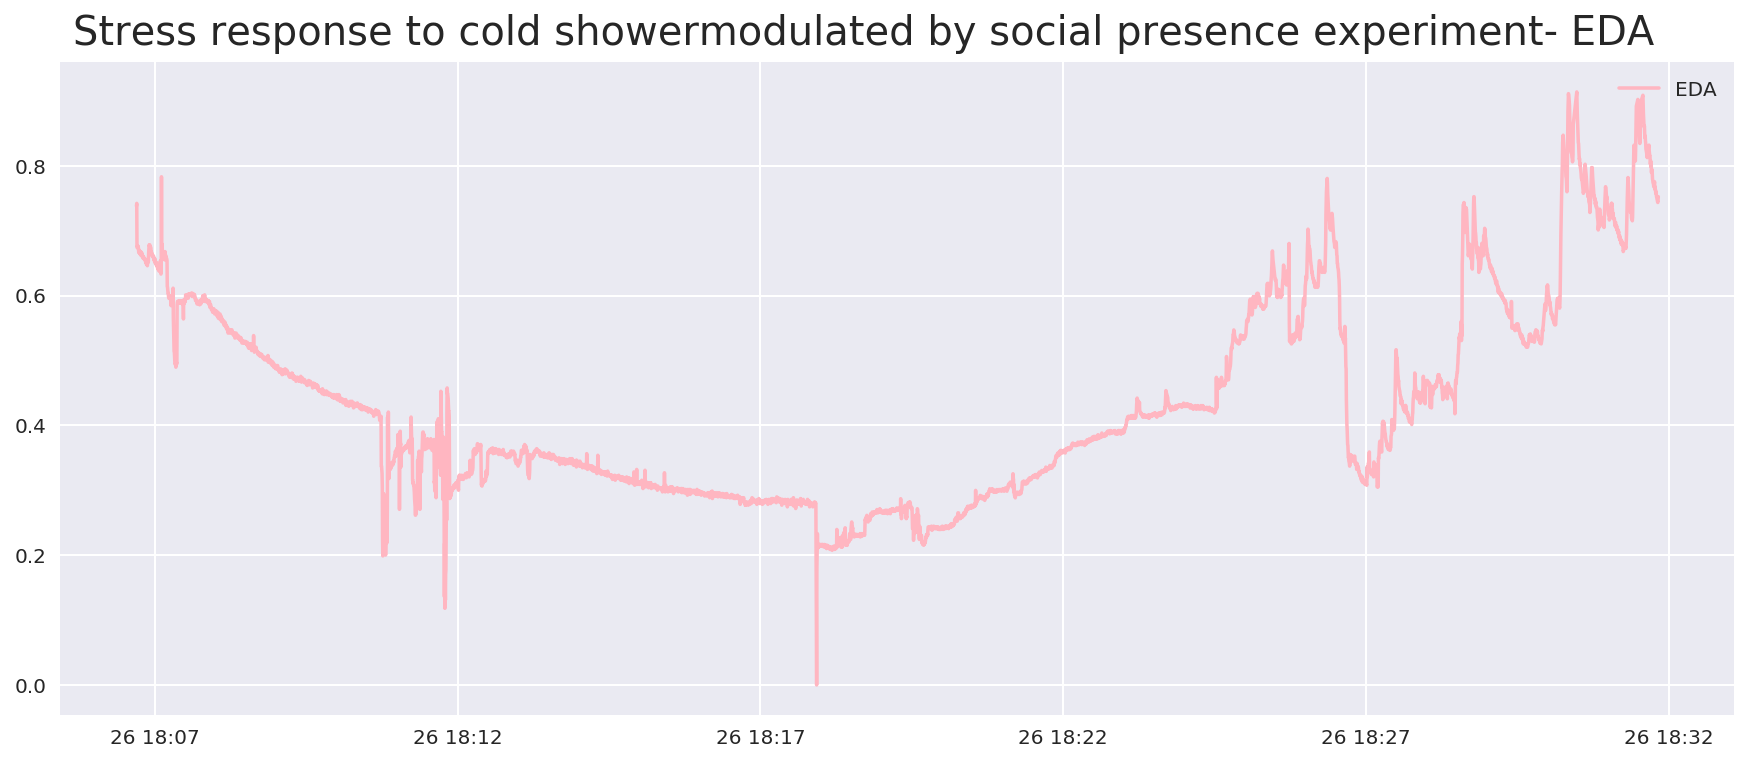

In [25]:
plt.figure(figsize=(15,6))
plt.plot(fl_exp1['eda'],color ='lightpink')
plt.figtext(.5,.9,'Stress response to cold showermodulated by social presence experiment- EDA ', fontsize=20, ha='center')
plt.legend(['EDA'],loc=1,fontsize='medium')
plt.axvline(x = tags_1.tagged_time[0],color = 'royalblue',linestyle='--')
plt.axvline(x = tags_1.tagged_time[1],color = 'royalblue',linestyle='--')
eda_mean = np.mean(fl_exp1.eda)
plt.axhline(y = eda_mean, color = 'skyblue', linestyle = '--')
plt.show()


## Logarithm 

In [ ]:
fl_exp1['eda'] = np.log(fl_exp1['eda'])
fl_exp1.head(5)

0.4280354560906515


TypeError: unorderable types: numpy.ndarray() > str()

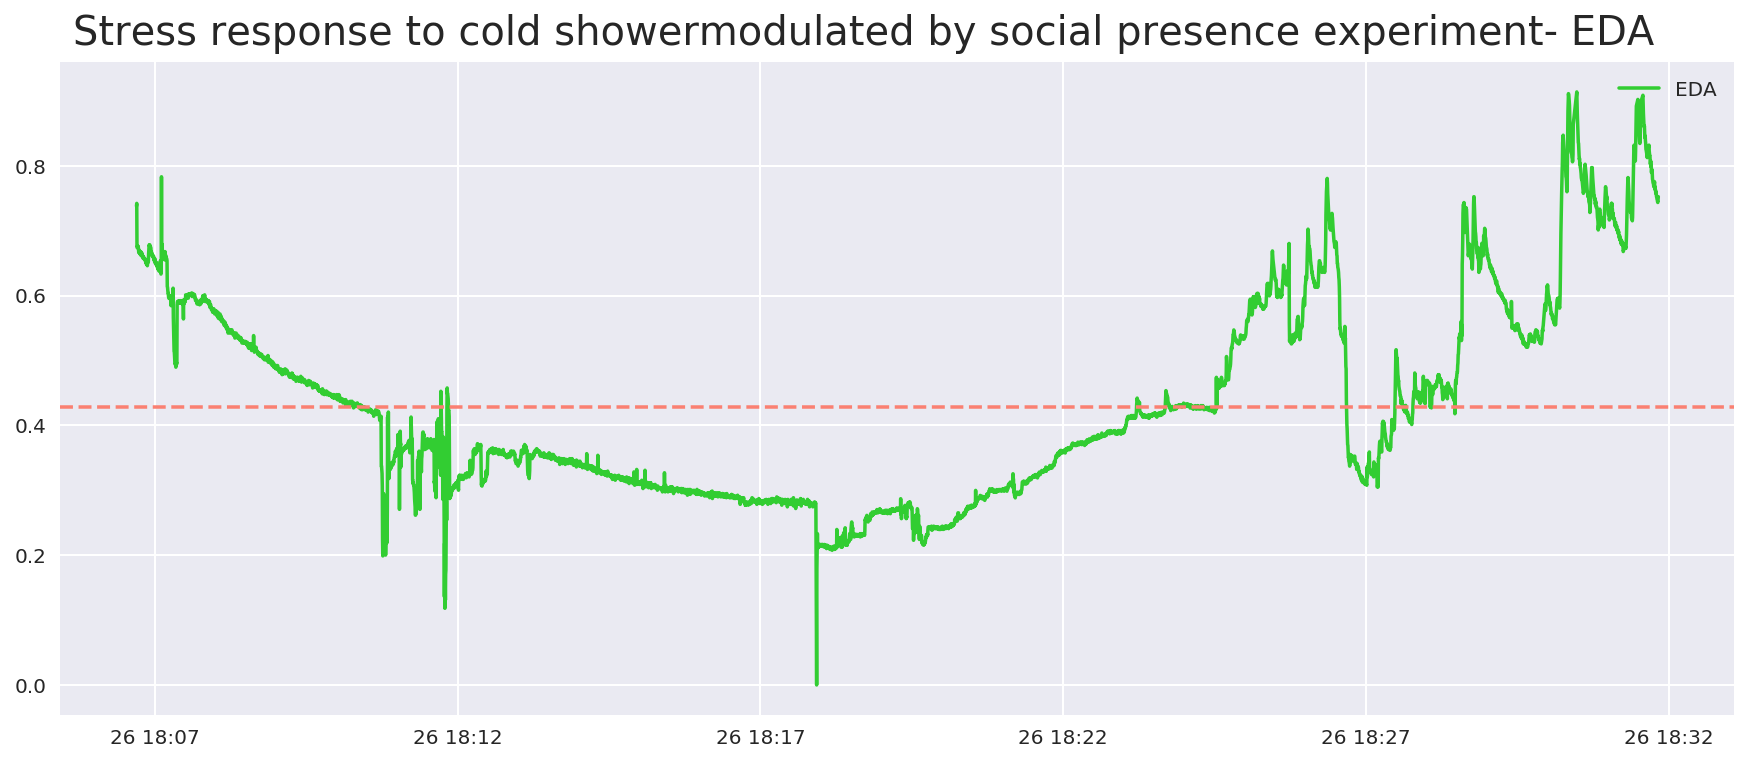

In [19]:
log_eda_mean = np.mean(fl_exp1.eda)
print(log_eda_mean)
plt.figure(figsize=(15,6))
plt.plot(fl_exp1['eda'],color ='limegreen')
plt.figtext(.5,.9,'Stress response to cold showermodulated by social presence experiment- EDA ', fontsize=20, ha='center')
plt.legend(['EDA'],loc=1,fontsize='medium')
plt.axhline(y = log_eda_mean,color = 'salmon',linestyle='--')
plt.axvline(x = tags_1.tagged_time[0],color = 'hotpink',linestyle='--')
plt.axvline(x = tags_1.tagged_time[1],color = 'hotpink',linestyle='--')

plt.show()